# Amazon Customer Behavior Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Step 1: Data Loading and Cleaning
file_path = "C:/Users/Lenovo/Documents/CSV & EXCEL/Amazon Customer Behavior Survey.csv"
data = pd.read_csv(file_path)

# Data Cleaning

In [3]:
# Clean Product Search Method
data['Product_Search_Method'] = data['Product_Search_Method'].fillna('Unknown')

# Parse Timestamps with a specified format (adjust format based on your data)
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Normalize Yes/No Columns
yes_no_columns = ['Personalized_Recommendation_Frequency', 'Add_to_Cart_Browsing',
                  'Review_Left', 'Review_Helpfulness', 'Recommendation_Helpfulness']
for col in yes_no_columns:
    data[col] = data[col].map(lambda x: x.lower() if isinstance(x, str) else x)

# Split Purchase Categories into lists
data['Purchase_Categories'] = data['Purchase_Categories'].apply(lambda x: x.split(';') if isinstance(x, str) else [])


In [4]:
#Verify Timestamp Parsing:
print(data['Timestamp'].head())  # Ensure timestamps are parsed correctly

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: Timestamp, dtype: datetime64[ns]


In [5]:
#Check Yes/No Columns:
print(data[yes_no_columns].head())  # Ensure the values are in lowercase

  Personalized_Recommendation_Frequency Add_to_Cart_Browsing Review_Left  \
0                                   yes                  yes         yes   
1                                   yes                  yes          no   
2                                    no                  yes          no   
3                             sometimes                maybe         yes   
4                                   yes                  yes          no   

  Review_Helpfulness Recommendation_Helpfulness  
0                yes                        yes  
1                yes                  sometimes  
2                 no                         no  
3                yes                  sometimes  
4                yes                        yes  


In [6]:
#Validate Purchase Categories:
print(data['Purchase_Categories'].head())  # Ensure values are lists

0                           [Beauty and Personal Care]
1                               [Clothing and Fashion]
2    [Groceries and Gourmet Food, Clothing and Fash...
3    [Beauty and Personal Care, Clothing and Fashio...
4     [Beauty and Personal Care, Clothing and Fashion]
Name: Purchase_Categories, dtype: object


In [7]:
#Saving cleaned Dataset
cleaned_file_path = r'C:/Users/Lenovo/Documents/CSV & EXCEL/Cleaned_Amazon_Customer_Behavior.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to C:/Users/Lenovo/Documents/CSV & EXCEL/Cleaned_Amazon_Customer_Behavior.csv


# EDA

In [8]:
# Step 2: Exploratory Data Analysis and Visualizations
sns.set_theme(style="whitegrid")

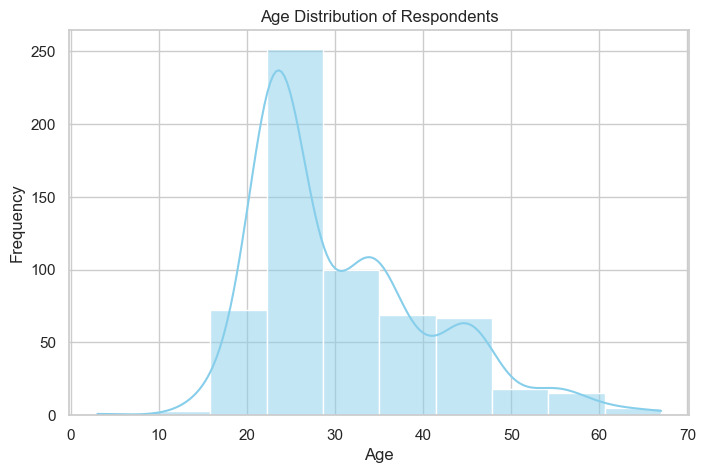

In [9]:
# Q1: Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

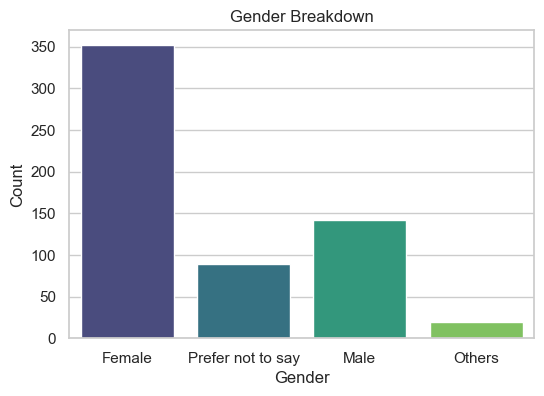

In [10]:
# Q2: Gender Breakdown
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='viridis', hue='Gender', dodge=False, legend=False)
plt.title('Gender Breakdown')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

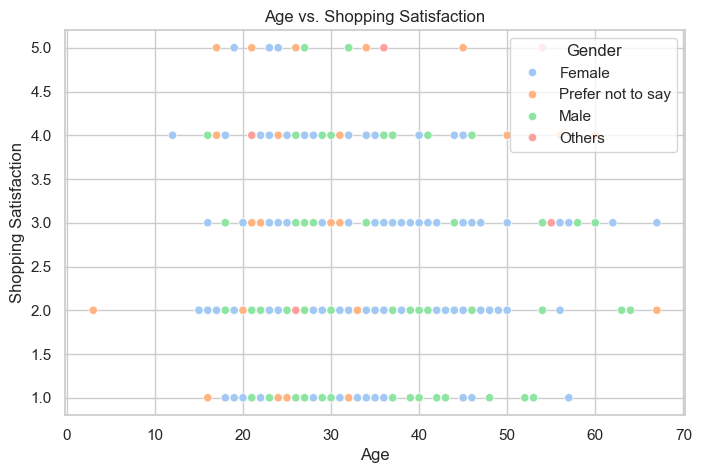

In [11]:
# Q3: Age vs. Shopping Satisfaction
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='Shopping_Satisfaction', hue='Gender', data=data, palette='pastel')
plt.title('Age vs. Shopping Satisfaction')
plt.xlabel('Age')
plt.ylabel('Shopping Satisfaction')
plt.show()

In [12]:
print(data['Purchase_Categories'].head())
print(data['Purchase_Categories'].isnull().sum())  # Check for null values

0                           [Beauty and Personal Care]
1                               [Clothing and Fashion]
2    [Groceries and Gourmet Food, Clothing and Fash...
3    [Beauty and Personal Care, Clothing and Fashio...
4     [Beauty and Personal Care, Clothing and Fashion]
Name: Purchase_Categories, dtype: object
0


In [13]:
print(type(data['Purchase_Categories'].iloc[0]))

<class 'list'>


In [14]:
#Fix Formatting: If Purchase_Categories is a string rather than a list, split it correctly:
data['Purchase_Categories'] = data['Purchase_Categories'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

In [15]:
category_counts = Counter([cat for sublist in data['Purchase_Categories'] for cat in sublist])
if category_counts:  # Check if Counter is not empty
    categories, counts = zip(*category_counts.items())
else:
    print("No categories found in the data.")

No categories found in the data.


In [16]:
if not category_counts:
    print("No purchase categories to visualize.")
else:
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(categories), palette='cool')
    plt.title('Popular Purchase Categories')
    plt.xlabel('Number of Mentions')
    plt.ylabel('Categories')
    plt.show()

No purchase categories to visualize.


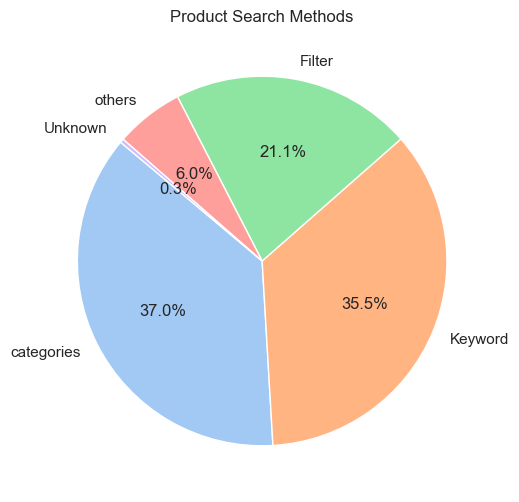

In [17]:
# Q5: Product Search Methods
search_counts = data['Product_Search_Method'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(search_counts, labels=search_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Product Search Methods')
plt.show()

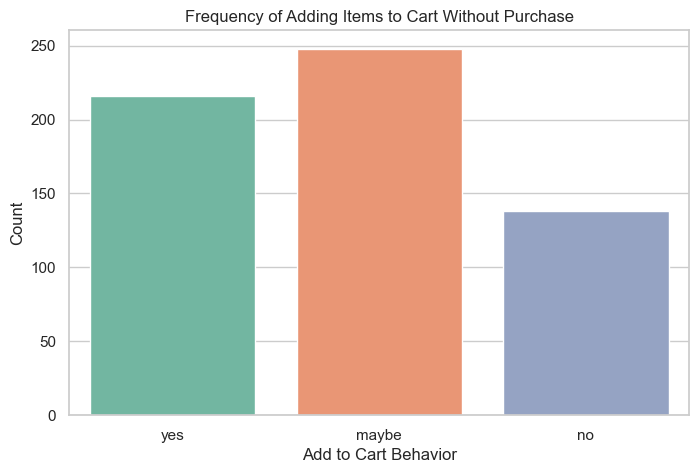

In [18]:
# Q6: Add to Cart Behavior
plt.figure(figsize=(8, 5))
sns.countplot(x='Add_to_Cart_Browsing', data=data, hue='Add_to_Cart_Browsing', palette='Set2', legend=False)
plt.title('Frequency of Adding Items to Cart Without Purchase')
plt.xlabel('Add to Cart Behavior')
plt.ylabel('Count')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6812\1320039484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shopping_Satisfaction', data=data, palette='viridis')


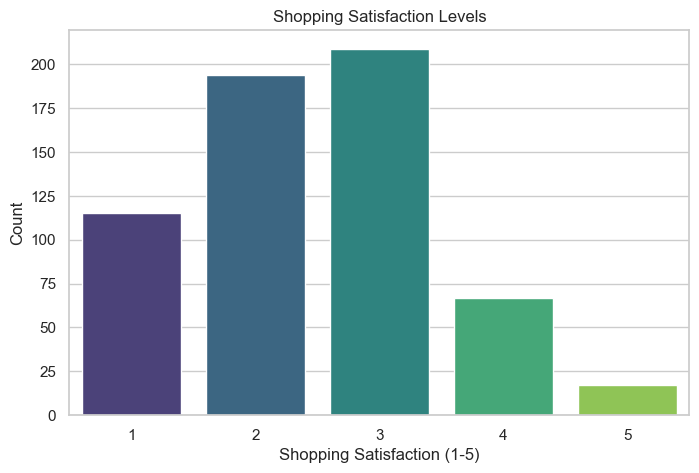

In [19]:
# Q7: Shopping Satisfaction Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Shopping_Satisfaction', data=data, palette='viridis')
plt.title('Shopping Satisfaction Levels')
plt.xlabel('Shopping Satisfaction (1-5)')
plt.ylabel('Count')
plt.show()

In [20]:
print(data.columns)

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')


In [21]:
numerical_cols = ['age', 'Customer_Reviews_Importance', 'Shopping_Satisfaction']  # Adjusted list

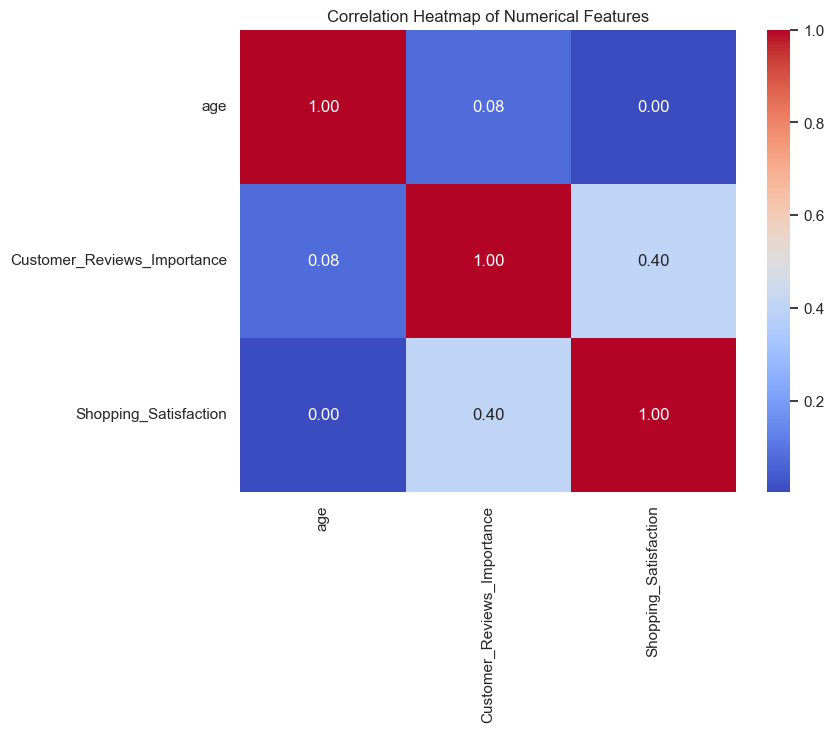

In [22]:
# Q8: Correlation Between Satisfaction and Other Factors
plt.figure(figsize=(8, 6))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6812\3477795470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personalized_Recommendation_Frequency', y='Shopping_Satisfaction', data=data, palette='coolwarm')


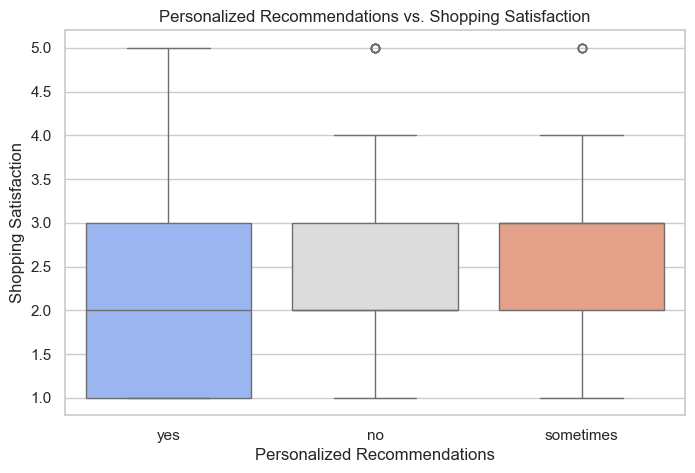

In [23]:
# Q10: Personalized Recommendations and Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(x='Personalized_Recommendation_Frequency', y='Shopping_Satisfaction', data=data, palette='coolwarm')
plt.title('Personalized Recommendations vs. Shopping Satisfaction')
plt.xlabel('Personalized Recommendations')
plt.ylabel('Shopping Satisfaction')
plt.show()

In [24]:
# Step 3: Conclusion
print("EDA complete. Key questions answered with visualizations and cleaned data saved.")

EDA complete. Key questions answered with visualizations and cleaned data saved.
